IMPORTING LIBRAIRES 

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

import keras as keras
from keras.preprocessing.image import ImageDataGenerator


In [52]:
import os 
from PIL import Image
from tqdm import tqdm 

train_df='/Users/mehakpreetsingh/Documents/DATA   SCIENCE/DATA SCIENCE PROJECT/Wildfire Dectection CNN/forest_fire/Training'
for root,_,files in os.walk(train_df):
    for i in tqdm(files , desc='processing images'):
        file_path_traning = os.path.join(root,i)
    try:
        img=Image.open(file_path_traning)
        img.verify()
    except Exception as e:
        os.remove(file_path_traning)



processing images: 0it [00:00, ?it/s]
processing images: 100%|██████████| 904/904 [00:00<00:00, 821770.87it/s]


In [53]:
import os
from PIL import Image
from tqdm import tqdm

test_df='/Users/mehakpreetsingh/Documents/DATA   SCIENCE/DATA SCIENCE PROJECT/Wildfire Dectection CNN/forest_fire/Testing'
for root,_,files in os.walk(test_df):
     for i in tqdm(files, desc='proceesing images'):
         file_path_testing=os.path.join(root,i)
     try:
        img=Image.open(file_path_testing)
        img.verify()
     except Exception as e:
        os.remove(file_path_testing)

         

proceesing images: 100%|██████████| 46/46 [00:00<00:00, 414920.40it/s]


In [62]:
train_df_gen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,shear_range=0.2,horizontal_flip=True)
train_data_set=train_df_gen.flow_from_directory(train_df,batch_size=32,class_mode='binary',target_size=(64,64))

Found 1832 images belonging to 2 classes.


In [63]:
test_df_gen=ImageDataGenerator(rescale=1./255)
test_data_set=train_df_gen.flow_from_directory(test_df,batch_size=32,class_mode='binary',target_size=(64,64))

Found 68 images belonging to 2 classes.


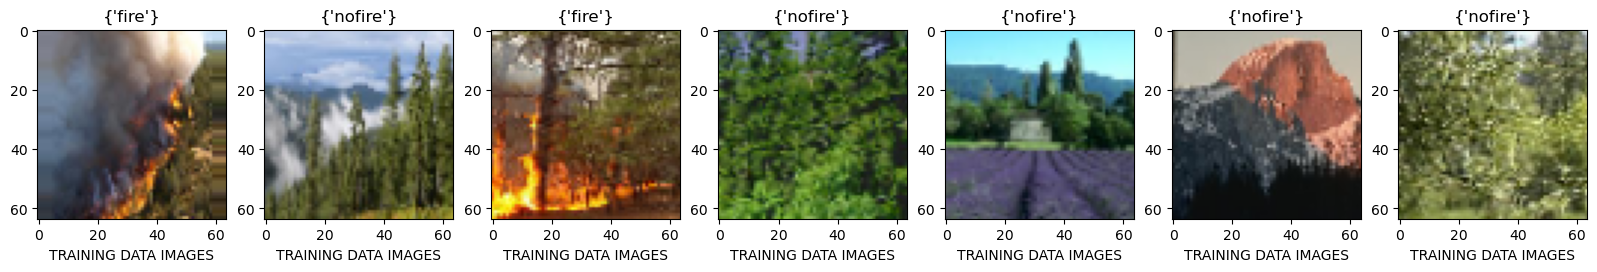

In [142]:
num=7
images, lables=next(train_data_set)

class_train=train_data_set.class_indices
index_train={v: k for k , v in class_train.items()}

plt.figure(figsize=(20,6))
for i in range(num):
    
    plt.subplot(2,num,i+1)
    plt.imshow(images[i])
    plt.xlabel('TRAINING DATA IMAGES')
    plt.title({index_train[lables[i]]})
    






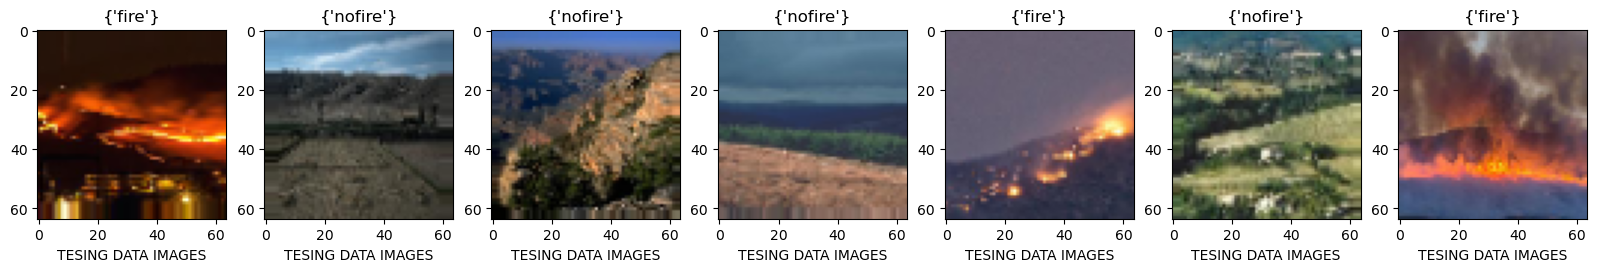

In [141]:
num=7

images, lables=next(test_data_set)

class_test=test_data_set.class_indices
index_test={v: k for k , v in class_test.items()}

plt.figure(figsize=(20,6))

for i in range(num):
    plt.subplot(2,num,i+1)
    plt.imshow(images[i])
    plt.title({index_test[lables[i]]})
    plt.xlabel('TESING DATA IMAGES')

In [72]:
CNN=tf.keras.models.Sequential()

In [73]:
CNN.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3,input_shape=[64,64,3],activation='relu'))

In [74]:
CNN.add(tf.keras.layers.MaxPool2D(pool_size=3,strides=2))

In [75]:
CNN.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3,activation='relu'))
CNN.add(tf.keras.layers.MaxPool2D(pool_size=3,strides=2))


In [76]:
CNN.add(tf.keras.layers.Flatten())

In [78]:
CNN.add(tf.keras.layers.Dense(units=128,activation='relu'))
CNN.add(tf.keras.layers.Dense(units=128,activation='relu'))
CNN.add(tf.keras.layers.Dense(units=128,activation='relu'))
CNN.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [79]:
CNN.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [80]:
CNN.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [106]:
history=CNN.fit(x=train_data_set,validation_data=test_data_set,batch_size=32,epochs=4)

Epoch 1/4
58/58 [==============================] - 5s 86ms/step - loss: 0.1084 - accuracy: 0.9623 - val_loss: 0.1919 - val_accuracy: 0.9265
Epoch 2/4
58/58 [==============================] - 4s 72ms/step - loss: 0.1069 - accuracy: 0.9651 - val_loss: 0.1586 - val_accuracy: 0.9412
Epoch 3/4
58/58 [==============================] - 4s 70ms/step - loss: 0.0981 - accuracy: 0.9629 - val_loss: 0.1460 - val_accuracy: 0.9559
Epoch 4/4
58/58 [==============================] - 4s 70ms/step - loss: 0.0872 - accuracy: 0.9705 - val_loss: 0.2474 - val_accuracy: 0.9265


In [143]:
loss, accuracy=CNN.evaluate(test_data_set)
print(f'The Accuracy of CCN Model is {(accuracy)*100}%')

3/3 [==============================] - 0s 29ms/step - loss: 0.2058 - accuracy: 0.9559
The Accuracy of CCN Model is 95.58823704719543%


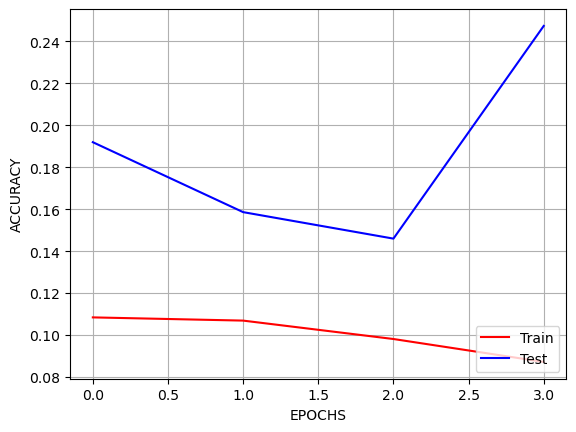

In [144]:
plt.plot(history.history['loss'],label='Train',color='red')
plt.plot(history.history['val_loss'],label='Test',color='blue')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.legend(loc='lower right')
plt.grid(True)

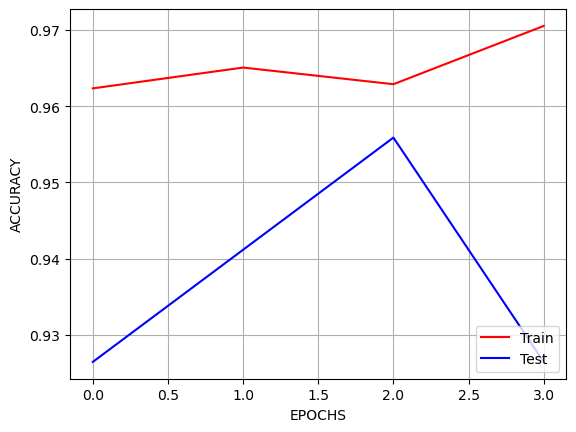

In [145]:
plt.plot(history.history['accuracy'],label='Train',color='red')
plt.plot(history.history['val_accuracy'],label='Test',color='blue')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.legend(loc='lower right')
plt.grid(True)

1/1 [==============================] - 0s 55ms/step


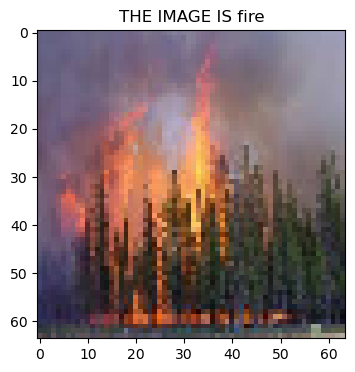

In [146]:
from tensorflow.keras.preprocessing import image

input_image=image.load_img('/Users/mehakpreetsingh/Downloads/images.jpeg',target_size=(64,64,3))
input_image_array=image.img_to_array(input_image)

input_image_dimx=np.expand_dims(input_image_array,axis=0)
input_image_dimx=input_image_dimx/255.0


predict=CNN.predict(input_image_dimx)


predicted_index=np.argmax(predict,axis=1)

class_index=train_data_set.class_indices
index_class={v: k for k , v in class_index.items()}

OUTPUT=index_class[predicted_index[0]]


plt.figure(figsize=(6,4))
plt.imshow(input_image)
plt.title(F'THE IMAGE IS {OUTPUT}')
plt.show()


In [179]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten


In [181]:
base_vgg16=VGG16(weights='imagenet',include_top=False,input_shape=(64,64,3))
for layers in base_vgg16.layers:
    layers.trainable=False

In [184]:
x=Flatten()(base_vgg16.output)
x=Dense(units=128,activation='relu')(x)
x=Dense(units=1,activation='sigmoid')(x)

In [185]:
vgg16_model=Model(inputs=base_vgg16.inputs,outputs=x)

In [186]:
vgg16_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [187]:
vgg16_model.fit(x=train_data_set,validation_data=test_data_set,epochs=10,batch_size=32)

Epoch 1/10
58/58 [==============================] - 46s 782ms/step - loss: 0.2584 - accuracy: 0.8843 - val_loss: 0.2164 - val_accuracy: 0.9265
Epoch 2/10
58/58 [==============================] - 51s 871ms/step - loss: 0.1232 - accuracy: 0.9569 - val_loss: 0.1484 - val_accuracy: 0.9412
Epoch 3/10
58/58 [==============================] - 52s 894ms/step - loss: 0.1028 - accuracy: 0.9656 - val_loss: 0.2165 - val_accuracy: 0.9265
Epoch 4/10
58/58 [==============================] - 56s 969ms/step - loss: 0.0899 - accuracy: 0.9645 - val_loss: 0.1379 - val_accuracy: 0.9559
Epoch 5/10
58/58 [==============================] - 59s 1s/step - loss: 0.0875 - accuracy: 0.9689 - val_loss: 0.1490 - val_accuracy: 0.9412
Epoch 6/10
58/58 [==============================] - 58s 1s/step - loss: 0.1036 - accuracy: 0.9612 - val_loss: 0.1454 - val_accuracy: 0.9412
Epoch 7/10
58/58 [==============================] - 67s 1s/step - loss: 0.0719 - accuracy: 0.9743 - val_loss: 0.1567 - val_accuracy: 0.9559
Epoch 8/

1/1 [==============================] - 0s 96ms/step
 THE INPUT IMAAGE IS fire


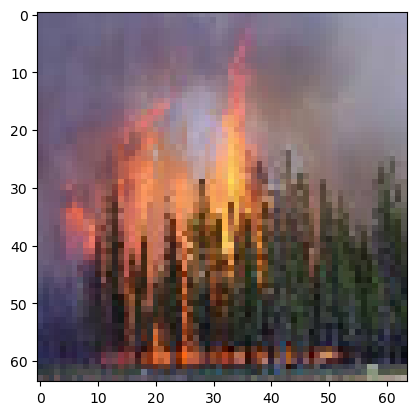

In [190]:
from tensorflow.keras.preprocessing import image

input_vgg16_image=image.load_img('/Users/mehakpreetsingh/Downloads/images.jpeg',target_size=(64,64,3))
image_rray=image.img_to_array(input_vgg16_image)
dimx=np.expand_dims(image_rray,axis=0)
dimx=dimx/255.0


predicy_vgg16=vgg16_model.predict(dimx)

pred_index=np.argmax(predicy_vgg16)


class_vggh16=train_data_set.class_indices
indx_vgg16={v: k for k , v in class_vggh16.items()}

print(f' THE INPUT IMAAGE IS {indx_vgg16[pred_index]}')

plt.imshow(input_vgg16_image)


In [192]:
loss , accuracy=vgg16_model.evaluate(test_data_set)
print(f'THE VGG16 MODEL ACCURACY IS {accuracy*100}')

3/3 [==============================] - 2s 492ms/step - loss: 0.1801 - accuracy: 0.9412
THE VGG16 MODEL ACCURACY IS 94.11764740943909
